# Case 2. Diabetic Retinopathy Analysis
Nuttapol Saiboonruen<br>
Last edited: 03.03.2019<br>
Cognitive Systems for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## 1. Objectives

1. Classify Diabetic Retinopathy case for normal(0) or non-normal (1-4) from images.
2. Lower result that we prdict the non-normal as normal case.
3. Getting high accuracy(above 75%) of the model that can predict the right answer.
4. the model can avoid the over-fitting.
5. Preprocess or handle the unbalance data.

## 2. Required libraries

### Import libraries
First we import all libraries (or modules) and functions needed in this session.

- [`import time`](https://duckduckgo.com/?q=python+time.time&t=ffab&atb=v150-2__&ia=about) we use for clocking the training evaluation time
- [`import warnings`](https://docs.python.org/2/library/warnings.html#temporarily-suppressing-warnings) is used for suppress warnings at the very end of the code
- `import pandas as pd` imports the pandas library and we can use the short notation `pd`
- `import numpy as np` imports the numpy library and we can use the short notation `np`
- `import matplotlib.pyplot as plt` imports the matplotlib library and we can use the short notation `plt`
- `import tensorflow as tf` imports the tensorflow library and we can use the short notation `tf`
-  `from sklearn ...` we import some special functions from scikit-learn module
- `from keras ...` is used for special keras functions

In [146]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os, shutil, cv2, time
import tensorflow as tf
import warnings


## 3. Data description and preprocessing

### Define the variables
First of all we define the variables that we will use in this case.

In [155]:
SIZE = 20000 # Total number of images pooled from 300_train
BATCH_SIZE = 32 
TRAIN_STEPS = SPLIT // BATCH_SIZE # Steps per epoch when we train the model
VALID_STEPS = (SIZE - SPLIT) // BATCH_SIZE
EPOCHS = 100
N_EPOCHS = 0
IMAGE_SIZE = 299 # Size of the image that we will feed to our models
print('Data size:    ', SIZE)
print('Batch size:      ', BATCH_SIZE)
print('Training steps:  ', TRAIN_STEPS)
print('Validation steps:', VALID_STEPS)
print('Epochs:          ', EPOCHS)
print('Image size:      ', (IMAGE_SIZE, IMAGE_SIZE, 3))

Data size:     20000
Batch size:       32
Training steps:   218
Validation steps: 406
Epochs:           100
Image size:       (299, 299, 3)


### Create Directorry
We create the temporary directory for train and test image that we will edit its.

In [131]:
# Create destination directory for train image.
dest_dir = './temp/'

try:
    os.mkdir(dest_dir)
    print('Created a directory:', dest_dir)
except:
    # Temp directory already exist, so clear it
    for file in os.listdir(dest_dir):  
        file_path = os.path.join(dest_dir, file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(e)
    print(dest_dir, ' cleared.')
    
# Create destination directory for test image.
dest_test_dir = './temp_test/'

try:
    os.mkdir(dest_test_dir)
    print('Created a directory:', dest_test_dir)
except:
    # Temp directory already exist, so clear it
    for file in os.listdir(dest_test_dir):  
        file_path = os.path.join(dest_test_dir, file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(e)
    print(dest_test_dir, ' cleared.')
    

./temp/  cleared.
./temp_test/  cleared.


### Import  and modify the data
We import the data Diabetic Retinopathy from the source directory as raw data.<br>

From the given data set the num column(label) have 5 score (0-4) 0 means healthy and 1-4 mean unhealthy. But we need only two score 0 and 1 to determine healthy and unhealthy. So we edit the lebel into the binary level for use in binary classification model and create the dataframe for train and test.<br>
After that, we crop and resize the original images and save into our temporary  directory that we was create befor.

In [132]:
# Read the train image names and labels
df = pd.read_csv('../Bigdataset/newTrainLabels.csv')
# Read the test image names and labels
df_test = pd.read_csv('../Bigdataset/retinopathy_solution.csv')

# Use binary labels
df['level'] = 1*(df['level'] > 0)
df_test['level'] = 1*(df_test['level'] > 0)


# Take SIZE number of samples from dataframe
df = df.sample(n = SIZE, random_state = 1)
df_test = df_test.sample(n = SIZE, random_state = 1)

# Source directory for training dataset
source_dir = '../Bigdataset/300_train/'

# Source directory for testing dataset
source_test_dir = '../Bigdataset/300_test/'

# Start timing
start = time.time()

# Crop and resize all images. Store them to dest_dir
print('Cropping and rescaling the images:')
for i, file in enumerate(df['image']):
    try:
        fname = source_dir + file + '.jpeg'
        img = cv2.imread(fname)
    
        # Crop the image to the height
        h, w, c = img.shape
        if w > h:
            wc = int(w/2)
            w0 = wc - int(h/2)
            w1 = w0 + h
            img = img[:, w0:w1, :]
        # Rescale to N x N
        N = IMAGE_SIZE
        img = cv2.resize(img, (N, N))
        # Save
        new_fname = dest_dir + file + '.png'
        cv2.imwrite(new_fname, img)
    except:
        # Display the image name having troubles
        print(fname)
         
    # Print the progress for every N images
    if (i % 2000 == 0) & (i > 0):
        print('{:} images resized in {:.2f} seconds.'.format(i, time.time()-start))
# End timing
print('Total elapsed time for train data {:.2f} seconds.'.format(time.time()-start))
        
# Start timing
start = time.time()    

# Crop and resize all images. Store them to dest_test_dir
for i, file in enumerate(df_test['image']):
    try:
        fname = source_test_dir + file + '.jpeg'
        img = cv2.imread(fname)
    
        # Crop the image to the height
        h, w, c = img.shape
        if w > h:
            wc = int(w/2)
            w0 = wc - int(h/2)
            w1 = w0 + h
            img = img[:, w0:w1, :]
        # Rescale to N x N
        N = IMAGE_SIZE
        img = cv2.resize(img, (N, N))
        # Save
        new_fname = dest_test_dir + file + '.png'
        cv2.imwrite(new_fname, img)
    except:
        # Display the image name having troubles
        print(fname)
         
    # Print the progress for every N images
    if (i % 2000 == 0) & (i > 0):
        print('{:} images resized in {:.2f} seconds.'.format(i, time.time()-start))

# End timing
print('Total elapsed time for test data {:.2f} seconds.'.format(time.time()-start))

Cropping and rescaling the images:
2000 images resized in 22.64 seconds.
4000 images resized in 46.57 seconds.
6000 images resized in 69.22 seconds.
8000 images resized in 91.77 seconds.
../Bigdataset/300_train/29344_left.jpeg
10000 images resized in 114.15 seconds.
12000 images resized in 136.48 seconds.
14000 images resized in 158.59 seconds.
16000 images resized in 180.81 seconds.
18000 images resized in 204.37 seconds.
Total elapsed time for train data 226.80 seconds.
2000 images resized in 23.05 seconds.
4000 images resized in 46.25 seconds.
6000 images resized in 69.58 seconds.
8000 images resized in 92.53 seconds.
10000 images resized in 115.76 seconds.
12000 images resized in 139.67 seconds.
14000 images resized in 163.99 seconds.
16000 images resized in 188.19 seconds.
18000 images resized in 213.17 seconds.
Total elapsed time for test data 236.27 seconds.


In [133]:
# Check number of images in each classes of training data
df.groupby('level').count()

,image,MB
level,,
0,14666,14666
1,5334,5334


In [134]:
# Check number of images in each classes of testing data
df_test.groupby('level').count()

,image,Usage
level,,
0,14785,14785
1,5215,5215


### Resampling
As the first sampling dataframe. The dataframe are very unbalance in both class. When we use the unbalance data to train the model, the result come up with high accuracy but it equals to the ratio of both classes. That means the model didn't learn anything but it just guess all to be normal(0) that are in dataset around 70% and get the accuracy around 70%. So, We dicide to resampling the data equally in both class by using `apply(lambda)`.<br>
Lastly we [shuffle](https://duckduckgo.com/?q=python+suffle&t=ffab&atb=v150-2__&ia=qa), e.g. change randomly the order of the rows.


In [136]:
warnings.filterwarnings("ignore")

# Resample by getting the balance data in both classes and take only 10000 rows
df = df.groupby('level').apply(lambda x: x.sample(5000 , random_state=1).reset_index(drop=True))
df_test = df_test.groupby('level').apply(lambda x: x.sample(5000 , random_state=1).reset_index(drop=True))

print("Train dataframe")
df.head()

Train dataframe


image  level        MB
level                                
0     0  26274_right      0  0.139201
      1   27979_left      0  0.113056
      2  26000_right      0  0.146800
      3   34128_left      0  0.152133
      4   7751_right      0  0.122585

In [137]:
print("Test dataframe")
df_test.head()

Test dataframe


image  level    Usage
level                               
0     0  30258_right      0  Private
      1   9792_right      0  Private
      2    7933_left      0  Private
      3   34579_left      0   Public
      4  36617_right      0  Private

In [138]:
# Shuffle the dataframe
from sklearn.utils import shuffle
df=shuffle(df)
df_test=shuffle(df_test)

image  level        MB
level                                   
0     717    21280_left      0  0.134530
1     4444  36300_right      1  0.106229
      2718  19254_right      1  0.133123
0     1305  37060_right      0  0.134912
      4992   32551_left      0  0.122864

In [139]:
# Check the size of train dataframe
df.shape

(10000, 3)

In [140]:
# Check the size of test dataframe
df_test.shape

(10000, 3)

### Visualize data
We visualize the dataframe to see how many elements in each claases.

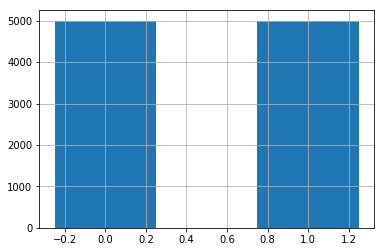

In [141]:
# Create level histogram
df['level'].hist(bins = [0,1,2], rwidth = 0.5, align = 'left');

###  Modify dataframe

According to the problem that we face that is generator need dataframe level column values should be the string because now column values are integer. So, we change it to string by using `dataframe['column_name'].apply(str)`<br>
Next, we add file type to the image column because we found the problem that if we didn't add the file type when we generate model it cannot find any match images.

In [142]:
# Change level column values to String
df['level'] = df['level'].apply(str)
df_test['level'] = df_test['level'].apply(str)

# Add file type of image into dataframe image cloumn
df.image=df.image+'.png'
df_test.image=df_test.image+'.png'

df.head()

image level        MB
level                                      
0     717    21280_left.png     0  0.134530
1     4444  36300_right.png     1  0.106229
      2718  19254_right.png     1  0.133123
0     1305  37060_right.png     0  0.134912
      4992   32551_left.png     0  0.122864

## 4. Image Preprocessing


As we don't know how good and clear of the original images that we will use to train our models and we don't have a large dataset. We preprocess the image to improve the image data(features) that will important for our models by rescale, zoom, rotate, flip the original.<br><br>

After that, we generate the train and validation batch of augmented from dataframe and images.

In [157]:
# Create image data generator
from keras.preprocessing.image import ImageDataGenerator

DF_SIZE = 10000
SPLIT = 7000

# Validation generator, only rescale the images from 0..255 to range 0..1
valid_generator = ImageDataGenerator(rescale = 1./255)

# Test generator, only rescale the images from 0..255 to range 0..1
test_generator = ImageDataGenerator(rescale = 1./255)

# Train generator: zoom, rotate and flip
train_generator = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.1,
    rotation_range = 180,
    horizontal_flip = True,
    vertical_flip = True)

# Training flow
print('Training flow:')
train_flow = train_generator.flow_from_dataframe(
    dataframe = df[:SPLIT], # read from data frame from 0 to SPLIT
    directory = dest_dir,
    has_ext = False,
    x_col = 'image', 
    y_col = 'level', 
    target_size = (IMAGE_SIZE, IMAGE_SIZE),   
    classes = ['0','1'], 
    class_mode = 'binary', 
    batch_size = BATCH_SIZE, 
    shuffle = True, 
    seed = 1)

# Validation flow
print('Validation flow:')
valid_flow = valid_generator.flow_from_dataframe(
    dataframe = df[SPLIT:], # read data frame from SPLIT to END
    directory = dest_dir,
    has_ext = False,
    x_col = 'image', 
    y_col = 'level', 
    target_size = (IMAGE_SIZE, IMAGE_SIZE), 
    classes = ['0', '1'], 
    class_mode = 'binary', 
    batch_size = BATCH_SIZE, 
    shuffle = False)

Training flow:
Found 7000 images belonging to 2 classes.
Validation flow:
Found 3000 images belonging to 2 classes.


## 5. Modeling and compilation


The model is very simple sequential architecture with 14 layers (8 convolution layers, 5 MaxPooling layers, 1 fully connection layer).<br>
The input(299x299 image size with 3 layer of RGB) is connected to convolution layer with 32 filters(3x3x3), then connected the same two layers with filter(3x3x32), which connect to 2x2 maxpooling layer with stride = 2, <br>
it connected to the next convolution layer with 64 filters(3x3x32), which connect to 2x2 maxpooling layer with stride = 2,<br>
then connected to the next two convolution layers with 128 filters(3x3x64) and 128 filters(3x3x128) respectively, which connect to 2x2 maxpooling layer with stride = 2,
connected to the next convolution layers with 256 filters(3x3x128), which connect to 2x2 maxpooling layer with stride = 2,<br>
then connected to the next convolution layers with 512 filters(3x3x256) that all convolution layers  use ReLU(Rectified Linear Unit) as activation function, which connect to 2x2 maxpooling layer with stride = 2,<br>
then connected to flatten layer that will flat the large metrix to one vector, which fully connected to 25089 neurons which use sigmoid as activation function and 1 output neurons That is separated by 1 dropout layer for prevent the over-fitting.

We use `sgd` optimizer and standard `binary_crossentropy` loss-function and `accuracy` metrics.

In [144]:
# Create a basic Sequential model with several Conv2D layers
from keras import layers
from keras import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras import optimizers

model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(299, 299, 3)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(512, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd,
             loss='binary_crossentropy', 
              metrics = ["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 295, 295, 32)      9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 293, 293, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 146, 146, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 144, 144, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 70, 70, 128)       73856     
__________

In [158]:
from time import time, localtime, strftime
# Testing with localtime and strftime
print(localtime())
print(strftime('%Y-%m-%d-%H%M%S', localtime()))

time.struct_time(tm_year=2019, tm_mon=3, tm_mday=3, tm_hour=21, tm_min=35, tm_sec=14, tm_wday=6, tm_yday=62, tm_isdst=0)
2019-03-03-213514


## 6. Training and Validation

In training we run 100 epochs with batch size of 32 and given validation data seperately. we correct history of each epochs for plotting the accuracy and loss graph to analyse the models.

In [159]:
# Calculate how many batches are needed to go through whole train and validation set
STEP_SIZE_TRAIN = SPLIT // BATCH_SIZE
STEP_SIZE_VALID = (DF_SIZE - SPLIT) // BATCH_SIZE
N = 100 # Number of epochs

# Train and count time
model_name = strftime('Case2-%Y-%m-%d-%H%M%S.h5', localtime())
t1 = time()
h = model.fit_generator(generator = train_flow  ,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = valid_flow,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = EPOCHS,
                    verbose = 1)

t2 = time()
elapsed_time = (t2 - t1)

# Save the model
model.save(model_name)
print('')
print('Model saved to file:', model_name)
print('')

# Print the total elapsed time and average time per epoch in format (hh:mm:ss)
t_total = strftime('%H:%M:%S', localtime(t2 - t1))
t_per_e = strftime('%H:%M:%S', localtime((t2 - t1)/N))
print('Total elapsed time for {:d} epochs: {:s}'.format(N, t_total))
print('Average time per epoch:             {:s}'.format(t_per_e))

# Save the history
import pickle
with open('trainHistory', 'wb') as file_pi:
    pickle.dump(h.history, file_pi)

Epoch 1/100
218/218 [==============================] - 137s 628ms/step - loss: 0.6932 - acc: 0.5016 - val_loss: 0.6925 - val_acc: 0.5181
Epoch 2/100
218/218 [==============================] - 127s 582ms/step - loss: 0.6929 - acc: 0.5108 - val_loss: 0.6925 - val_acc: 0.5017
Epoch 3/100
218/218 [==============================] - 129s 590ms/step - loss: 0.6929 - acc: 0.5097 - val_loss: 0.6922 - val_acc: 0.5138
Epoch 4/100
218/218 [==============================] - 128s 586ms/step - loss: 0.6926 - acc: 0.5205 - val_loss: 0.6910 - val_acc: 0.5384
Epoch 5/100
218/218 [==============================] - 131s 602ms/step - loss: 0.6923 - acc: 0.5194 - val_loss: 0.6910 - val_acc: 0.5145
Epoch 6/100
218/218 [==============================] - 127s 583ms/step - loss: 0.6917 - acc: 0.5318 - val_loss: 0.6886 - val_acc: 0.5462
Epoch 7/100
218/218 [==============================] - 130s 598ms/step - loss: 0.6916 - acc: 0.5173 - val_loss: 0.6883 - val_acc: 0.5610
Epoch 8/100
218/218 [====================

218/218 [==============================] - 134s 615ms/step - loss: 0.6794 - acc: 0.5651 - val_loss: 0.6708 - val_acc: 0.5984
Epoch 61/100
218/218 [==============================] - 131s 600ms/step - loss: 0.6823 - acc: 0.5663 - val_loss: 0.6743 - val_acc: 0.5889
Epoch 62/100
218/218 [==============================] - 134s 616ms/step - loss: 0.6796 - acc: 0.5720 - val_loss: 0.6849 - val_acc: 0.5350
Epoch 63/100
218/218 [==============================] - 134s 616ms/step - loss: 0.6760 - acc: 0.5799 - val_loss: 0.6706 - val_acc: 0.5900
Epoch 64/100
218/218 [==============================] - 132s 606ms/step - loss: 0.6768 - acc: 0.5740 - val_loss: 0.6717 - val_acc: 0.5829
Epoch 65/100
218/218 [==============================] - 132s 606ms/step - loss: 0.6748 - acc: 0.5812 - val_loss: 0.6885 - val_acc: 0.5515
Epoch 66/100
218/218 [==============================] - 132s 607ms/step - loss: 0.6819 - acc: 0.5661 - val_loss: 0.6759 - val_acc: 0.5738
Epoch 67/100
218/218 [=========================

## 7. Evaluation

In evaluation we calculate the accuracy by using accuracy = number of collect prediction/ Total number of prediction, and we also construct the confusion metrix. After that, we calculate the precision, recall and f-score.

In [160]:
# Validation flow
print('Validation flow:')
valid_flow = valid_generator.flow_from_dataframe(
    dataframe = df[SPLIT:], # read data frame from SPLIT to END
    directory = dest_dir,
    has_ext = False,
    x_col = 'image', 
    y_col = 'level', 
    target_size = (IMAGE_SIZE, IMAGE_SIZE), 
    classes = ['0', '1'], 
    class_mode = 'binary', 
    batch_size = BATCH_SIZE, 
    shuffle = False)

Validation flow:
Found 3000 images belonging to 2 classes.


In [161]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report
from sklearn.metrics import accuracy_score


# Function to display confusion matrix, classification report and final accuracy
def display_results(m, flow):
    # Get the true and predicted values
    y_true = flow.classes
    predict = m.predict_generator(flow, len(flow))
    y_pred = predict > 0.5

    # Calculate and print the metrics results

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    
        cm = confusion_matrix(y_true, y_pred)
        print('Confusion matrix:')
        print(cm)
        print('')

        a = accuracy_score(y_true, y_pred)
        print('Accuracy: {:.4f}'.format(a))
        print('')

        cr = classification_report(y_true, y_pred)
        print('Classification report:')
        print(cr)


In [162]:
print('RESULTS FOR FINAL MODEL')
print('VALIDATION SET')
display_results(model, valid_flow)

RESULTS FOR FINAL MODEL
VALIDATION SET
Confusion matrix:
[[ 278 1198]
 [  97 1427]]

Accuracy: 0.5683

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.19      0.30      1476
           1       0.54      0.94      0.69      1524

   micro avg       0.57      0.57      0.57      3000
   macro avg       0.64      0.56      0.49      3000
weighted avg       0.64      0.57      0.50      3000



## 8. Results and Discussion

Now we visualize the training results. First the accuracy and next loss-function.<br>
As you can see the accuracy graph below some time we getting a little over fitting model, for the loss function graph our model has quite high learning rate belong to the graph.

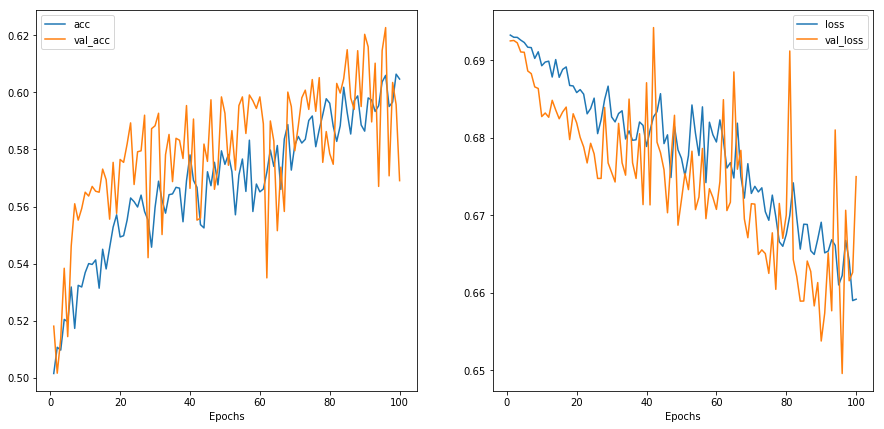

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(N) + 1.0

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))

def plotter(ax, epochs, h, variable):
    ax.plot(epochs, h.history[variable], label = variable)
    ax.plot(epochs, h.history['val_' + variable], label = 'val_'+variable)
    ax.set_xlabel('Epochs')
    ax.legend()

plotter(ax1, epochs, h, 'acc')
plotter(ax2, epochs, h, 'loss')
plt.show()

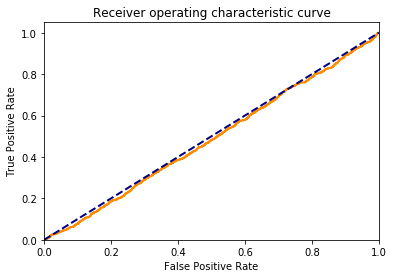

In [164]:
# Calculate and plot ROC-curve
# See: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
from sklearn.metrics import roc_curve

y_true =  valid_flow.classes
predict = model.predict_generator(valid_flow, len(valid_flow))

fpr, tpr, thresholds = roc_curve(y_true, predict)

plt.plot(fpr, tpr, color='darkorange', lw = 2)
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.show()

In [165]:
# Test flow
print('Test flow:')
test_flow = test_generator.flow_from_dataframe(
    dataframe = df_test[:DF_SIZE], # read data frame from SPLIT to END
    directory = dest_test_dir,
    has_ext = False,
    x_col = 'image', 
    y_col = 'level', 
    target_size = (IMAGE_SIZE, IMAGE_SIZE), 
    classes = ['0', '1'], 
    class_mode = 'binary', 
    batch_size = 32, 
    shuffle = False)

Test flow:
Found 10000 images belonging to 2 classes.


In [166]:
test_loss, test_acc = model.evaluate_generator(test_flow, len(test_flow))
print("Accuracy: ")
print(test_acc)

Accuracy: 
0.5431


## 8. Conclusions

&emsp; In conclusion, it quite hard to build the good model with small data set at first time. We decide to use the new bigger data set from kaggle to train our models. But after we have bigger dataset we face with new problem that is the data is very bias, our new dataset have sample in class 0 around 70% of whole data. It make our model didn't learn but it guess the result to 0 and coome up with high accuracy around 70%. So, we decided to balance our data for training by resampling. After that, the problem was solve. I try to build many model to find the best model that have highest accuracy. After playing with many model and searching what model that other people use for image classification we found the best 3 models base on high accuracy and less false positive.<br>
&emsp; The first one is model that have 5 convolution layers each layer use 32 filters with ReLU as activation function, which seperate 2  and 3 convolution layers by one 2x2 maxpooling layers and then connected to one fully connect layer with sigmoid as activation function. The result is we got the acceptable accuracy which around 62% and this moodel is quite over-fitting.<br> 
&emsp; Second model, it has 6 convolution layers first two layers use 32 filters next 2 layers use 64 filters  and the last two layers use 128 filters with ReLU as activation function, which seperate 2 and 2 and 2 convolution layers by one 2x2 maxpooling layers and then connected to two fully connect layers with sigmoid as activation function. The result is we got a bit lower accuracy from first model around 73% but this model be the over-fitting<br>
&emsp; Third model, this is our best model that we found. The model has 14 layers (8 convolution layers, 5 MaxPooling layers, 1 fully connection layer).
 The input(299x299 image size with 3 layer of RGB) is connected to convolution layer with 32 filters(3x3x3), then connected the same two layers with filter(3x3x32), which connect to 2x2 maxpooling layer with stride = 2, 
 it connected to the next convolution layer with 64 filters(3x3x32), which connect to 2x2 maxpooling layer with stride = 2,
 then connected to the next two convolution layers with 128 filters(3x3x64) and 128 filters(3x3x128) respectively, which connect to 2x2 maxpooling layer with stride = 2, connected to the next convolution layers with 256 filters(3x3x128), which connect to 2x2 maxpooling layer with stride = 2,
 then connected to the next convolution layers with 512 filters(3x3x256) that all convolution layers use ReLU(Rectified Linear Unit) as activation function, which connect to 2x2 maxpooling layer with stride = 2,
 then connected to flatten layer that will flat the large metrix to one vector, which fully connected to 25089 neurons which use sigmoid as activation function and 1 output neurons That is separated by 1 dropout layer for prevent the over-fitting as show with `model.summary()` above. The result that we got quite high accuracy that is around 85% and not found the over-fitting. For all model we train with 100 epochs and batch size of 32. Our models have quite high learing rate. But for our best model if we train with higher number of epochs it will have high accuracy.<br>
&emsp; for this work we had study and know more about image classification with using convolution, and come with the small and simple model that have satisfied accuracy and false positive. For some big model it doesn't have high accuracy every time base on many parameters(number of data, epochs, batch size, step per epoch etc.).